# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('keys.env')

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent = 4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19017237,
            "total_supply": 19017237,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41447.0,
                    "volume_24h": 24560963994,
                    "market_cap": 787928419352,
                    "percentage_change_1h": 0.530154037317432,
                    "percentage_change_24h": 0.327977840282944,
                    "percentage_change_7d": 3.08685605203329,
                    "percent_change_1h": 0.530154037317432,
                    "percent_change_24h": 0.327977840282944,
                    "percent_change_7d": 3.08685605203329
                }
            },
            "last_updated": 1650489866
        }
    },
    "metadata": {
        "timestamp": 1650489866,
        "num_crypt

In [9]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent = 4, sort_keys = True))


{
    "data": {
        "1027": {
            "circulating_supply": 120460234,
            "id": 1027,
            "last_updated": 1650489874,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 371435574217,
                    "percent_change_1h": 0.595781899830752,
                    "percent_change_24h": -0.396672527444797,
                    "percent_change_7d": 1.5134973384772,
                    "percentage_change_1h": 0.595781899830752,
                    "percentage_change_24h": -0.396672527444797,
                    "percentage_change_7d": 1.5134973384772,
                    "price": 3084.19,
                    "volume_24h": 15090500844
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120460234,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [15]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
# YOUR CODE HERE
btc_price

41447.0

In [16]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
eth_price


3084.19

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [17]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
btc_value


49736.4

In [18]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
eth_value


16346.207

In [19]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


66082.607

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [20]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [23]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [26]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['AGG', 'SPY']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
today = pd.Timestamp("2022-04-19", tz = "America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [37]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = prices_df[prices_df['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2022-04-19 04:00:00+00:00  103.26  103.4264  102.974  103.02  7845969   

                                                      SPY                 \
                          trade_count        vwap    open   high     low   
timestamp                                                                  
2022-04-19 04:00:00+00:00       32656  103.193615  437.87  445.8  437.68   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-19 04:00:00+00:00  445.04  77678099      597840  443.072191

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [29]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df['AGG']['close'][0]

# Print the AGG closing price
# YOUR CODE HERE
agg_close_price

103.02

In [30]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df['SPY']['close'][0]

# Print the SPY closing price
spy_close_price


445.04

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [31]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value


20604.0

In [33]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value


48954.4

In [34]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


69558.4

In [35]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
total_portfolio


135641.00699999998

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [38]:
# Consolidate financial assets data into a Python list
savings_data = [
    total_crypto_wallet,
    total_stocks_bonds
]

# Review the Python list savings_data
savings_data
    

[66082.607, 69558.4]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [39]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns = ['amounts'],
    index = ['crypto' , 'stocks/bonds']
)

# Display the savings_df DataFrame
savings_df


,amounts
crypto,66082.607
stocks/bonds,69558.400


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Composition of Savings Portfolio'}, ylabel='amounts'>

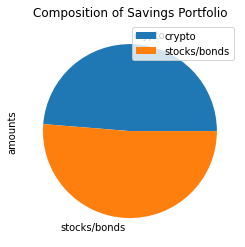

In [41]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amounts', title = 'Composition of Savings Portfolio')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [42]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [ ]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations!')
elif total_portfolio == emergency_fund_value:
    print("You've reached your goal!")
else:
    print(f'You are ${emergency_fund_value - total_portfolio} away from reaching your goal.')


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [45]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2019-04-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-26', tz = 'America/New_York').isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [48]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = prices_df[prices_df['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df


AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2019-04-26 04:00:00+00:00  108.74  108.7500  108.6600  108.71   2300074   
2019-04-29 04:00:00+00:00  108.56  108.6200  108.4900  108.52   2782634   
2019-04-30 04:00:00+00:00  108.56  108.6800  108.5135  108.59   7491505   
2019-05-01 04:00:00+00:00  108.47  108.7600  108.3200  108.40   6387911   
2019-05-02 04:00:00+00:00  108.30  108.3300  108.1000  108.16   3379510   
...                           ...       ...       ...     ...       ...   
2022-04-20 04:00:00+00:00  103.36  103.7356  103.3000  103.61   8434303   
2022-04-21 04:00:00+00:00  103.44  103.4700  102.7900  103.04  11393860   
2022-04-22 04:00:00+00:00  102.73  103.1800  102.6700  102.94   9152665   
2022-04-25 04:00:00+00:00  103.47  103.9300  103.4700  103.63   8768318   
2022-04-26 04:00:00+00:00  104.13  104.1300  103.8000  103.95   8533802   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2019-04-26 04:00:00+00:00        8664  108.705413  292.12  293.4900  291.2401   
2019-04-29 04:00:00+00:00        8977  108.539174  293.53  294.4500  293.4100   
2019-04-30 04:00:00+00:00       17892  108.620462  293.52  294.3400  291.9200   
2019-05-01 04:00:00+00:00       23490  108.455634  294.76  294.9500  291.8000   
2019-05-02 04:00:00+00:00       10083  108.172602  291.68  292.7000  289.5200   
...                               ...         ...     ...       ...       ...   
2022-04-20 04:00:00+00:00       32866  103.528935  446.95  447.5700  443.4800   
2022-04-21 04:00:00+00:00       35595  103.047589  448.58  450.0100  437.1000   
2022-04-22 04:00:00+00:00       31498  102.925863  436.94  438.0825  425.4400   
2022-04-25 04:00:00+00:00       31373  103.691097  423.70  428.6900  418.8400   
2022-04-26 04:00:00+00:00       30915  103.960003  425.92  426.0400  416.0700   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-04-26 04:00:00+00:00  293.41   51449173      220594  292.642502  
2019-04-29 04:00:00+00:00  293.87   61675682      186857  293.871519  
2019-04-30 04:00:00+00:00  294.02   81411933      254912  293.551590  
2019-05-01 04:00:00+00:00  291.81   71921870      337374  293.457138  
2019-05-02 04:00:00+00:00  291.18   65058183      342564  291.101680  
...                           ...        ...         ...         ...  
2022-04-20 04:00:00+00:00  444.71   64737457      591762  445.610168  
2022-04-21 04:00:00+00:00  438.06   85097110      719682  442.772969  
2022-04-22 04:00:00+00:00  426.04  132156403      972064  429.813156  
2022-04-25 04:00:00+00:00  428.51  119103454     1139830  423.952513  
2022-04-26 04:00:00+00:00  416.10  101074178     1001090  420.127020  

[757 rows x 14 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [49]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data = prices_df,
    weights = [.40, .60],
    num_simulation = 100,
    num_trading_days = 252 * 30
)

# Review the simulation input data
MC_thirty_year.portfolio_data


AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2019-04-26 04:00:00+00:00  108.74  108.7500  108.6600  108.71   2300074   
2019-04-29 04:00:00+00:00  108.56  108.6200  108.4900  108.52   2782634   
2019-04-30 04:00:00+00:00  108.56  108.6800  108.5135  108.59   7491505   
2019-05-01 04:00:00+00:00  108.47  108.7600  108.3200  108.40   6387911   
2019-05-02 04:00:00+00:00  108.30  108.3300  108.1000  108.16   3379510   
...                           ...       ...       ...     ...       ...   
2022-04-20 04:00:00+00:00  103.36  103.7356  103.3000  103.61   8434303   
2022-04-21 04:00:00+00:00  103.44  103.4700  102.7900  103.04  11393860   
2022-04-22 04:00:00+00:00  102.73  103.1800  102.6700  102.94   9152665   
2022-04-25 04:00:00+00:00  103.47  103.9300  103.4700  103.63   8768318   
2022-04-26 04:00:00+00:00  104.13  104.1300  103.8000  103.95   8533802   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-26 04:00:00+00:00        8664  108.705413          NaN  292.12   
2019-04-29 04:00:00+00:00        8977  108.539174    -0.001748  293.53   
2019-04-30 04:00:00+00:00       17892  108.620462     0.000645  293.52   
2019-05-01 04:00:00+00:00       23490  108.455634    -0.001750  294.76   
2019-05-02 04:00:00+00:00       10083  108.172602    -0.002214  291.68   
...                               ...         ...          ...     ...   
2022-04-20 04:00:00+00:00       32866  103.528935     0.005727  446.95   
2022-04-21 04:00:00+00:00       35595  103.047589    -0.005501  448.58   
2022-04-22 04:00:00+00:00       31498  102.925863    -0.000970  436.94   
2022-04-25 04:00:00+00:00       31373  103.691097     0.006703  423.70   
2022-04-26 04:00:00+00:00       30915  103.960003     0.003088  425.92   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2019-04-26 04:00:00+00:00  293.4900  291.2401  293.41   51449173      220594   
2019-04-29 04:00:00+00:00  294.4500  293.4100  293.87   61675682      186857   
2019-04-30 04:00:00+00:00  294.3400  291.9200  294.02   81411933      254912   
2019-05-01 04:00:00+00:00  294.9500  291.8000  291.81   71921870      337374   
2019-05-02 04:00:00+00:00  292.7000  289.5200  291.18   65058183      342564   
...                             ...       ...     ...        ...         ...   
2022-04-20 04:00:00+00:00  447.5700  443.4800  444.71   64737457      591762   
2022-04-21 04:00:00+00:00  450.0100  437.1000  438.06   85097110      719682   
2022-04-22 04:00:00+00:00  438.0825  425.4400  426.04  132156403      972064   
2022-04-25 04:00:00+00:00  428.6900  418.8400  428.51  119103454     1139830   
2022-04-26 04:00:00+00:00  426.0400  416.0700  416.10  101074178     1001090   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-26 04:00:00+00:00  292.642502          NaN  
2019-04-29 04:00:00+00:00  293.871519     0.001568  
2019-04-30 04:00:00+00:00  293.551590     0.000510  
2019-05-01 04:00:00+00:00  293.457138    -0.007516  
2019-05-02 04:00:00+00:00  291.101680    -0.002159  
...                               ...          ...  
2022-04-20 04:00:00+00:00  445.610168    -0.000742  
2022-04-21 04:00:00+00:00  442.772969    -0.014954  
2022-04-22 04:00:00+00:00  429.813156    -0.027439  
2022-04-25 04:00:00+00:00  423.952513     0.005798  
2022-04-26 04:00:00+00:00  420.127020    -0.028961  

[757 rows x 16 columns]

In [51]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007541,1.005409,1.001785,1.004972,1.010169,1.008750,0.997519,1.000661,1.003461,1.001018,...,1.008505,0.999753,1.010752,1.004838,1.012586,1.001016,1.002974,1.008815,1.001165,1.006775
2,0.999067,1.011623,1.009188,1.007359,1.018437,1.018351,0.995890,1.005088,1.017319,0.995174,...,0.987115,0.992333,1.019594,1.010082,1.012474,0.995916,0.990202,1.035563,0.987904,1.007682
3,1.009983,1.009043,1.012255,0.992222,1.037168,1.023718,0.998892,0.993927,1.022119,1.010843,...,0.974870,0.985908,1.025939,0.999254,1.019998,0.987906,1.001610,1.039290,0.989274,1.017738
4,1.016608,1.010662,1.026827,0.981852,1.038467,1.030656,0.987576,1.001090,1.025070,1.003829,...,0.966190,0.980120,1.018769,0.981344,1.014933,0.989178,0.983640,1.035374,0.967698,1.019427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.264331,3.039998,10.765496,9.431076,20.859681,8.649593,4.968841,8.474649,9.275067,3.632198,...,6.195309,9.992871,11.879951,2.558201,65.959726,6.634924,5.151961,19.159185,16.076083,3.816331
7557,13.120675,3.063665,10.828486,9.464903,20.851557,8.424831,4.996228,8.486826,9.350529,3.594884,...,6.116567,9.825324,11.701774,2.554274,64.612721,6.535189,5.049951,19.237909,15.971739,3.843048
7558,13.254036,3.054771,10.802707,9.450263,20.664575,8.549486,5.042232,8.570353,9.536877,3.629258,...,6.132007,9.943726,11.701086,2.577909,63.939391,6.568459,5.075760,19.301782,16.321422,3.860265
7559,13.234981,3.049497,10.810279,9.410755,20.641204,8.521502,5.048854,8.548501,9.598731,3.661693,...,6.035248,9.884718,11.611243,2.539139,64.455710,6.621046,5.024794,19.190244,16.309875,3.870781


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

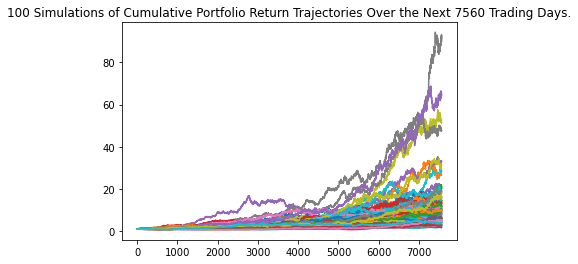

In [52]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_thirty_year.plot_simulation()



#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

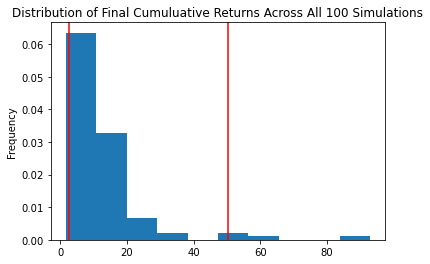

In [53]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_thirty_year.plot_distribution()



#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [54]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
summary_30 = MC_thirty_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
summary_30

count           100.000000
mean             12.434415
std              12.922642
min               1.635446
25%               5.694151
50%               9.691206
75%              13.716883
max              92.925683
95% CI Lower      2.559591
95% CI Upper     50.306092
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [55]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


69558.4

In [58]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(total_stocks_bonds * summary_30[8], 2)
ci_upper_thirty_cumulative_return = round(total_stocks_bonds * summary_30[9], 2)

# Print the result of your calculations
print(f'''Given the initial investment and allocation of ${total_stocks_bonds:.2f}, the model predicts the 
value after 30 years to be between ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}''')


Given the initial investment and allocation of $69558.40, the model predicts the 
value after 30 years to be between $178041.02 and $3499211.26


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [ ]:
**Answer** # YOUR ANSWER HERE